# Weather Py

---

# Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#!pip install citipy

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generate the Cities List by Using the citipy Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities


Number of cities in the list: 590


['asia',
 'grytviken',
 'carahue',
 'brisas de zicatela',
 'saudarkrokur',
 'argo',
 'afaahiti',
 'la passe',
 'tanjung selor',
 'buka',
 'port moresby',
 'hami',
 'adamstown',
 'qaqortoq',
 'daru',
 'wailua homesteads',
 "st. john's",
 'albany',
 'kruisfontein',
 'bredasdorp',
 'qarauyl',
 'port-aux-francais',
 'lata',
 'santa rosa misiones',
 'tiksi',
 'tazacorte',
 'taiohae',
 'puerto natales',
 'gananoque',
 'barabai',
 'ohara',
 'puerto ayora',
 'longyearbyen',
 'duong dong',
 'fuvahmulah',
 'waitangi',
 'atafu village',
 'avarua',
 'hermanus',
 'bethel',
 'hamilton',
 'thompson',
 'praia da vitoria',
 'yaren',
 'klyuchi',
 'invercargill',
 'ushuaia',
 'margaret river',
 'blackmans bay',
 'campos dos goytacazes',
 'ancud',
 'tranovaho',
 'hartsville',
 'oroqen zizhiqi',
 'kodiak',
 'kolonia',
 'edinburgh of the seven seas',
 'jijiga',
 'sitka',
 'aasiaat',
 'qingdao',
 'kill devil hills',
 'babu',
 'santa terezinha',
 'east london',
 'sao gabriel da cachoeira',
 'utrik',
 'carnarv

---
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
#First, the URL of Open Weather Map  API
url= "http://api.openweathermap.org/data/2.5/weather?"
units="metric"



# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#this, is to see the name of the information that i need.
city_url = f"{url}appid={weather_api_key}&units={units}&q="
#url_city=city_url + "invercargill"
#url_city

city_weather = requests.get(city_url + "hilo").json()
city_weather
#city_weather["coord"]["lat"]




Beginning Data Retrieval     
-----------------------------


{'coord': {'lon': -155.09, 'lat': 19.7297},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 26.53,
  'feels_like': 26.53,
  'temp_min': 24.23,
  'temp_max': 27.36,
  'pressure': 1020,
  'humidity': 83},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 50},
 'clouds': {'all': 100},
 'dt': 1690323207,
 'sys': {'type': 1,
  'id': 7881,
  'country': 'US',
  'sunrise': 1690300413,
  'sunset': 1690347594},
 'timezone': -36000,
 'id': 5855927,
 'name': 'Hilo',
 'cod': 200}

In [6]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
         # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
  
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 1 | asia
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | carahue
Processing Record 4 of Set 1 | brisas de zicatela
Processing Record 5 of Set 1 | saudarkrokur
Processing Record 6 of Set 1 | argo
Processing Record 7 of Set 1 | afaahiti
Processing Record 8 of Set 1 | la passe
Processing Record 9 of Set 1 | tanjung selor
City not found. Skipping...
Processing Record 10 of Set 1 | buka
Processing Record 11 of Set 1 | port moresby
Processing Record 12 of Set 1 | hami
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | daru
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | st. john's
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | kruisfontein
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | qarauyl
Processing Record 22 of Set 1 | port-aux-francais
Processing Record 23 of Set 1 | lata
Processing Reco

In [7]:
#print(city_data)

city_data_df=pd.DataFrame(city_data)
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [8]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,asia,9.5506,122.5164,27.40,83,99,8.87,PH,1690323248
1,grytviken,-54.2811,-36.5092,-3.48,80,76,4.60,GS,1690323248
2,carahue,-38.7000,-73.1667,8.03,94,56,2.03,CL,1690323248
3,brisas de zicatela,15.8369,-97.0419,31.29,55,75,3.09,MX,1690323249
4,saudarkrokur,65.7461,-19.6394,7.38,90,59,3.39,IS,1690323249


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,asia,9.5506,122.5164,27.40,83,99,8.87,PH,1690323248
1,grytviken,-54.2811,-36.5092,-3.48,80,76,4.60,GS,1690323248
2,carahue,-38.7000,-73.1667,8.03,94,56,2.03,CL,1690323248
3,brisas de zicatela,15.8369,-97.0419,31.29,55,75,3.09,MX,1690323249
4,saudarkrokur,65.7461,-19.6394,7.38,90,59,3.39,IS,1690323249


## Create the Scatter Plots Requested

### Latitute vs. Temperature

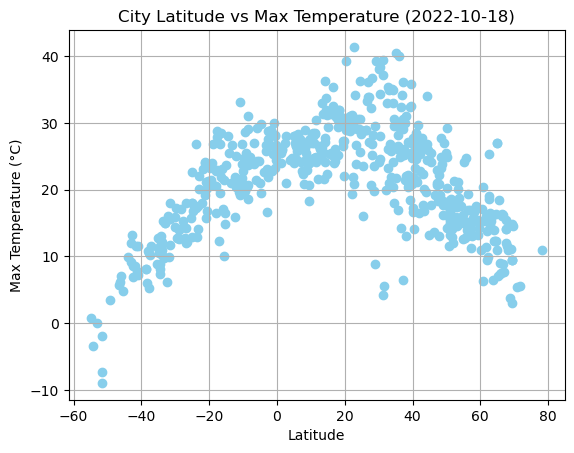

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],marker="o",facecolor="skyblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude vs Max Temperature (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()



### Latitute vs. Humidity

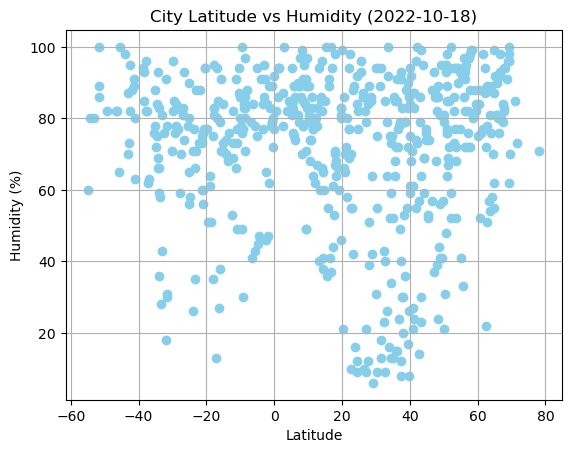

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o",facecolor="skyblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

### Latitude vs Cloudiness

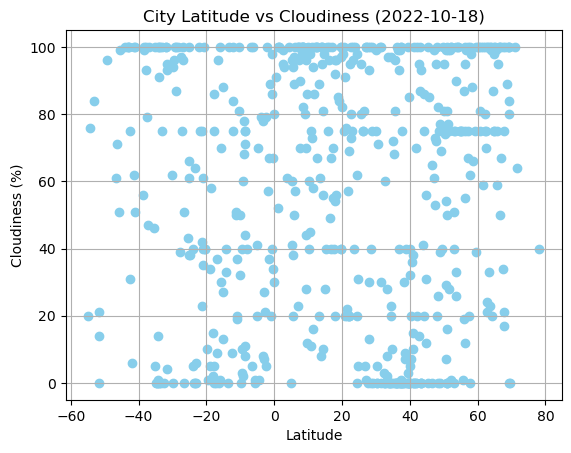

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o",facecolor="skyblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

### Latitude vs Wind Speed Plot

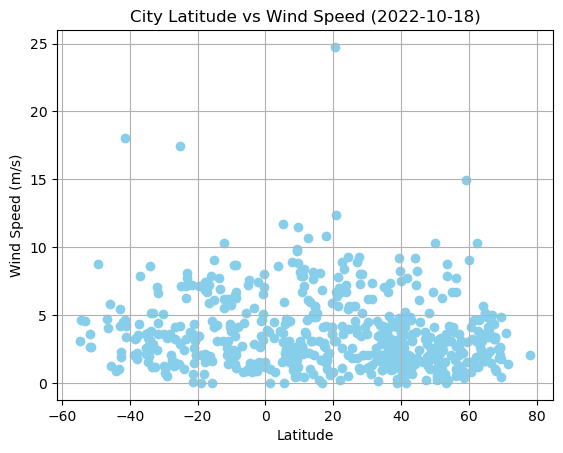

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o",facecolor="skyblue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

___
## Requirement 2: Compute Linear Regression for Each Relationship

In [15]:
# Define a function to create Linear Regression plots

def regline(x_data,y_data):
    (slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_data,y_data)
    return "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))

def regvalue(x_data,y_data):
    (slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_data,y_data)
    return x_data*slope+intercept

def errvalue(x_data,y_data):
    (slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_data,y_data)
    return rvalue



In [16]:
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,asia,9.5506,122.5164,27.40,83,99,8.87,PH,1690323248
3,brisas de zicatela,15.8369,-97.0419,31.29,55,75,3.09,MX,1690323249
4,saudarkrokur,65.7461,-19.6394,7.38,90,59,3.39,IS,1690323249
5,argo,37.6333,22.7333,30.04,30,0,2.05,GR,1690323249
7,la passe,45.5549,-0.8967,17.77,74,85,4.47,FR,1690323250


In [17]:
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,-3.48,80,76,4.60,GS,1690323248
2,carahue,-38.7000,-73.1667,8.03,94,56,2.03,CL,1690323248
6,afaahiti,-17.7500,-149.2833,27.93,81,0,6.88,PF,1690323249
9,port moresby,-9.4431,147.1797,20.68,100,40,1.54,PG,1690323250
11,adamstown,-25.0660,-130.1015,22.64,90,100,17.44,PN,1690323251


###  Temperature vs. Latitude Linear Regression Plot

The r-value is :0.4104136211911812


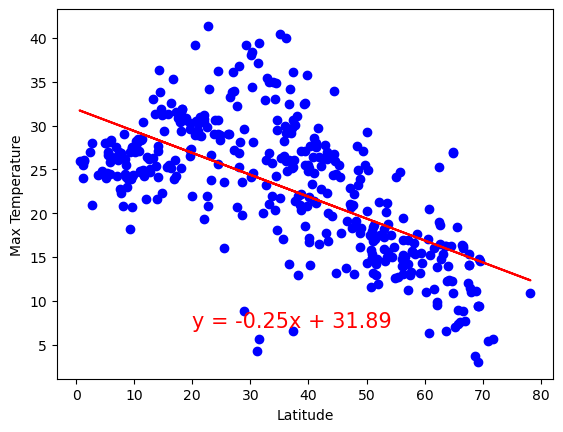

In [18]:

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],marker="o",facecolor="blue")
plt.plot(northern_hemi_df["Lat"],regvalue(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"]),"r-")
plt.annotate(regline(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"]),(20,7),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
rvalue=errvalue(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

print(f"The r-value is :{rvalue**2}")
plt.show()



The r-value is :0.7670446359635746


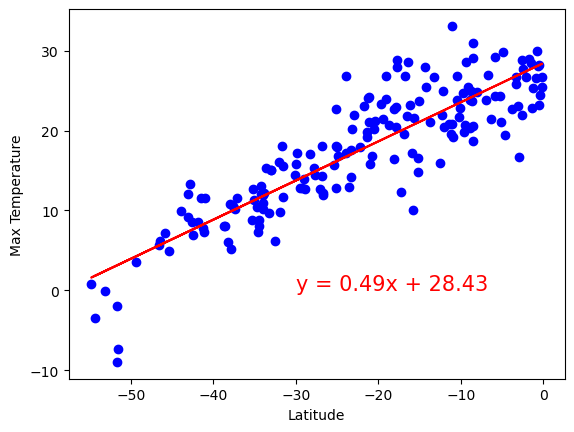

In [19]:

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],marker="o",facecolor="blue")
plt.plot(southern_hemi_df["Lat"],regvalue(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"]),"r-")
plt.annotate(regline(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"]),(-30,0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
rvalue=errvalue(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

print(f"The r-value is :{rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 
In the Regression between Latitude and Max Temperature, south is positive correlation and north have a negative correlation. This, you can see with the r-value because in both case, r-value is close to 1. Alse you can think that this is correct because the latitude "0" is the middle of the world and +50/-50 are the polos of the world, so in south hemisfere if you are going up in latitude, you are going to the middle of the world so the temperature increase, but if you are in the north polo and you go to the middle of the world, the latitude decrease and the temperature increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is :0.0015084189395543663


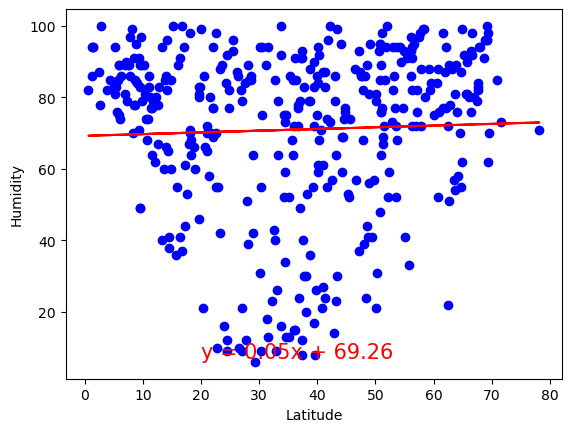

In [20]:

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],marker="o",facecolor="blue")
plt.plot(northern_hemi_df["Lat"],regvalue(northern_hemi_df["Lat"],northern_hemi_df["Humidity"]),"r-")
plt.annotate(regline(northern_hemi_df["Lat"],northern_hemi_df["Humidity"]),(20,7),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
rvalue=errvalue(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

print(f"The r-value is :{rvalue**2}")
plt.show()


The r-value is :0.7670446359635746


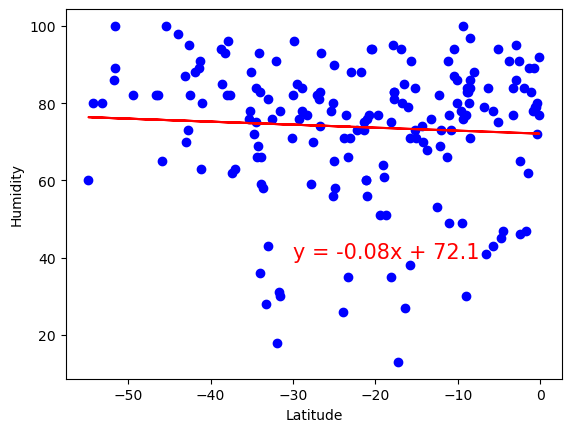

In [21]:
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],marker="o",facecolor="blue")
plt.plot(southern_hemi_df["Lat"],regvalue(southern_hemi_df["Lat"],southern_hemi_df["Humidity"]),"r-")
plt.annotate(regline(southern_hemi_df["Lat"],southern_hemi_df["Humidity"]),(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
rvalue=errvalue(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

print(f"The r-value is :{rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
In the Regression between Latitude and Humidity, south is negative correlation and north doesnt have correlation. in the case of north hemisfere, you can see this because r-value is close to zero, so you can not explain the temperature since the latitude in north. In the south hemisfere, we can see that this correlation is close to one, so you can explain the humidity if you have the latitude, but the problem is that the most of cities have high humidity

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is :0.0037196234455270393


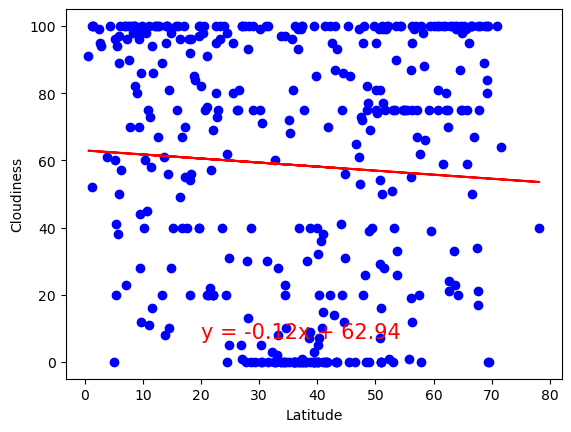

In [22]:
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],marker="o",facecolor="blue")
plt.plot(northern_hemi_df["Lat"],regvalue(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"]),"r-")
plt.annotate(regline(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"]),(20,7),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
rvalue=errvalue(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

print(f"The r-value is :{rvalue**2}")
plt.show()


The r-value is :0.029430167738225488


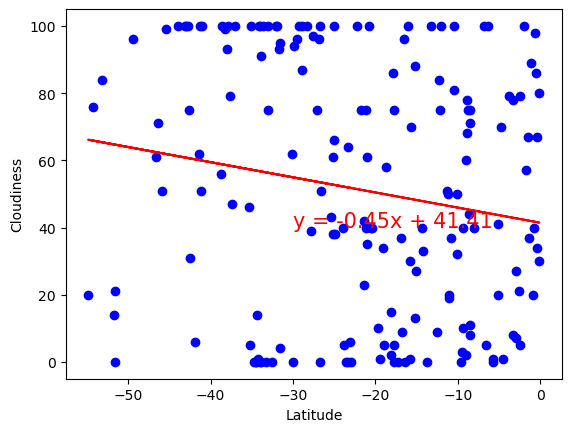

In [23]:
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],marker="o",facecolor="blue")
plt.plot(southern_hemi_df["Lat"],regvalue(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"]),"r-")
plt.annotate(regline(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"]),(-30,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
rvalue=errvalue(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

print(f"The r-value is :{rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
In the Regression between Latitude and cloudiness, both reggresions the correlation is negative and the r-value close to 0, so you can conclude that you can not explain the cloudiness if you have the latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is :0.027356014847196134


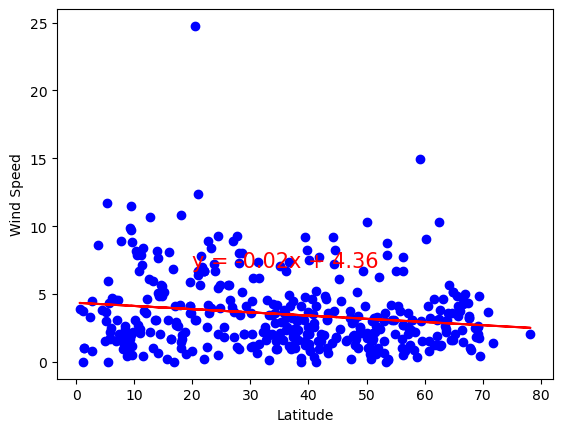

In [24]:
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],marker="o",facecolor="blue")
plt.plot(northern_hemi_df["Lat"],regvalue(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"]),"r-")
plt.annotate(regline(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"]),(20,7),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
rvalue=errvalue(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

print(f"The r-value is :{rvalue**2}")
plt.show()


The r-value is :1.999265145674205e-06


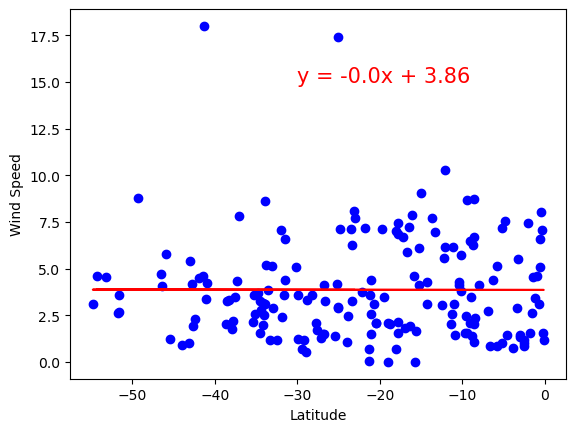

In [25]:
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],marker="o",facecolor="blue")
plt.plot(southern_hemi_df["Lat"],regvalue(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"]),"r-")
plt.annotate(regline(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"]),(-30,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
rvalue=errvalue(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

print(f"The r-value is :{rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
In the Regression between Latitude and wind speed, both reggresions the correlation is negative and the r-value close to 0, so you can conclude that you can not explain the cloudiness if you have the latitude. Also, you can see that in both cases, the wind speed is similar regardless of latitude.